This is a quick first pass for the all-state kaggle competition.  No data transforms or explaration, just a quick and dirty  neural net.

Run time is about 10 mins (1 min per Epoch--later I "cranked" the epochs to  50 see if I could ever get the validation set error to increase).   Development time ~ 1 hour
Hardware GeForce GTX 650 Ti
Intel(R) Core(TM) i5-2500K CPU @ 3.30GHz
DIMM DDR3 Synchronous 1333 MHz (0.8 ns)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [83]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [84]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


So we have categorical and continuous variables.  Lets take a look at the size of our data

In [85]:
print(train.shape)
print(test.shape)

(188318, 132)
(125546, 131)


Just in case I want to combine the two sets, I will add a 'loss' column to test

In [86]:
test['loss']=np.nan

Here I am just going to select out the feature that are categorical and those that are continuous

In [87]:
feat_cont = [f for f in train.columns if 'cont' in f]
feat_cat = [f for f in train.columns if 'cat' in f]

Take a look at the range on continuous variables--first put all the data together

In [88]:
data=train
n=train.shape[0]
data=data.append(test)
for col in feat_cont:
    print(col, data[col].max(),data[col].min())

cont1 0.984975 1.6e-05
cont2 0.862654 0.001149
cont3 0.944251 0.002634
cont4 0.956046 0.176921
cont5 0.983674 0.281143
cont6 0.997162 0.012683
cont7 1.0 0.069503
cont8 0.9828 0.23688
cont9 0.9954 8e-05
cont10 0.99498 0.0
cont11 0.998742 0.035321
cont12 0.998484 0.036232
cont13 0.988494 0.000228
cont14 0.844848 0.178568


Looks like they are mostly between 0 and 1.

Change each label to a numeric label.  

In [93]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for col in feat_cat:
    data[col]=le.fit_transform(data[col])
    


Lets take a look at the categorical features.

In [94]:
for col in feat_cat:
    print(col, data[col].max(),data[col].min())

cat1 1 0
cat2 1 0
cat3 1 0
cat4 1 0
cat5 1 0
cat6 1 0
cat7 1 0
cat8 1 0
cat9 1 0
cat10 1 0
cat11 1 0
cat12 1 0
cat13 1 0
cat14 1 0
cat15 1 0
cat16 1 0
cat17 1 0
cat18 1 0
cat19 1 0
cat20 1 0
cat21 1 0
cat22 1 0
cat23 1 0
cat24 1 0
cat25 1 0
cat26 1 0
cat27 1 0
cat28 1 0
cat29 1 0
cat30 1 0
cat31 1 0
cat32 1 0
cat33 1 0
cat34 1 0
cat35 1 0
cat36 1 0
cat37 1 0
cat38 1 0
cat39 1 0
cat40 1 0
cat41 1 0
cat42 1 0
cat43 1 0
cat44 1 0
cat45 1 0
cat46 1 0
cat47 1 0
cat48 1 0
cat49 1 0
cat50 1 0
cat51 1 0
cat52 1 0
cat53 1 0
cat54 1 0
cat55 1 0
cat56 1 0
cat57 1 0
cat58 1 0
cat59 1 0
cat60 1 0
cat61 1 0
cat62 1 0
cat63 1 0
cat64 1 0
cat65 1 0
cat66 1 0
cat67 1 0
cat68 1 0
cat69 1 0
cat70 1 0
cat71 1 0
cat72 1 0
cat73 2 0
cat74 2 0
cat75 2 0
cat76 2 0
cat77 3 0
cat78 3 0
cat79 3 0
cat80 3 0
cat81 3 0
cat82 3 0
cat83 3 0
cat84 3 0
cat85 3 0
cat86 3 0
cat87 3 0
cat88 3 0
cat89 8 0
cat90 6 0
cat91 7 0
cat92 8 0
cat93 4 0
cat94 6 0
cat95 4 0
cat96 8 0
cat97 6 0
cat98 4 0
cat99 16 0
cat100 14 0
cat101

Looks like 70 are single variable (1,0), and 45 with multi-columns.  WHile we can one-hot encode, for this trail, we will just stick with the label to numeric conversion.  This is not a safe assumption, but ok for a first pass.

Now lets just scale all the variables so they have the same variance and are centered around 0.
First I will drop off the loss column though 

In [96]:
loss=data['loss']
data.drop(['loss'],inplace=True,axis=1)
data = scaler.fit_transform(data)

In [ ]:
Now create the training data x_train, the targets 'y' and separate out the test data 'test_input'

In [102]:
x_train=data[0:n,:]
test_input=data[n:,:]
y=loss[0:n]

In [107]:

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU

In [180]:
model = Sequential()
    
model.add(Dense(400, input_dim = x_train.shape[1], init = 'he_normal'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.4))
     
model.add(Dense(200, init = 'he_normal'))
model.add(PReLU())
model.add(BatchNormalization())    
model.add(Dropout(0.2))
model.add(Dense(50, init = 'he_normal'))
model.add(PReLU())
model.add(BatchNormalization())    
model.add(Dropout(0.2))
    
model.add(Dense(1, init = 'he_normal'))
model.compile(loss = 'mae', optimizer = 'adadelta')
    

In [181]:
outputs=model.fit(x_train, y, batch_size=32, nb_epoch=50, verbose=1, validation_split=0.20)

Train on 150654 samples, validate on 37664 samples
Epoch 1/50
150654/150654 [==============================] - 48s - loss: 1668.0576 - val_loss: 1234.1964
Epoch 2/50
150654/150654 [==============================] - 46s - loss: 1469.7258 - val_loss: 1209.2744
Epoch 3/50
150654/150654 [==============================] - 46s - loss: 1445.0060 - val_loss: 1195.7595
Epoch 4/50
150654/150654 [==============================] - 46s - loss: 1427.0252 - val_loss: 1191.2304
Epoch 5/50
150654/150654 [==============================] - 47s - loss: 1406.8352 - val_loss: 1194.8347
Epoch 6/50
150654/150654 [==============================] - 47s - loss: 1391.2148 - val_loss: 1183.9344
Epoch 7/50
150654/150654 [==============================] - 48s - loss: 1375.7379 - val_loss: 1183.3403
Epoch 8/50
150654/150654 [==============================] - 47s - loss: 1366.2131 - val_loss: 1180.7449
Epoch 9/50
150654/150654 [==============================] - 47s - loss: 1356.0460 - val_loss: 1175.4286
Epoch 10/50
1

Lets make some predictions

In [116]:
preds=model.predict( test_input, batch_size=32, verbose=0)

In [117]:
preds

array([[ 1567.00280762],
       [ 1642.50939941],
       [ 9320.90429688],
       ..., 
       [ 2483.25976562],
       [ 1282.08630371],
       [ 3342.95410156]], dtype=float32)

Little quirck on the output--even though preds is a 1-d array, it is a numpy array of length (n,1) which pandas see as a 2-d array.  to get around this, we either flatter or use ravel

I could probably just write to file, but this presents a nice view of the submission

In [149]:
output=pd.DataFrame({'id':test['id'],'loss':preds.ravel()})

In [150]:
output

,id,loss
0,4,1567.002808
1,6,1642.509399
2,9,9320.904297
3,12,5998.083008
4,15,882.344055
5,17,1835.220581
6,21,2105.648926
7,28,1097.714600
8,32,2825.964355
9,43,3117.325439


In [151]:
output.to_csv("first_pass.csv",index=False)

Good for 1949 place out of 3000 teams. (1168.6)   Not great, but many of those team copy and pasted kernels published.  Good effort vs reward. as top output has a loss of 1097--with 6.5% of the top for 5 mins computing and roughly 1 hour development.

Validation loss was below test (probably a function of sample size)

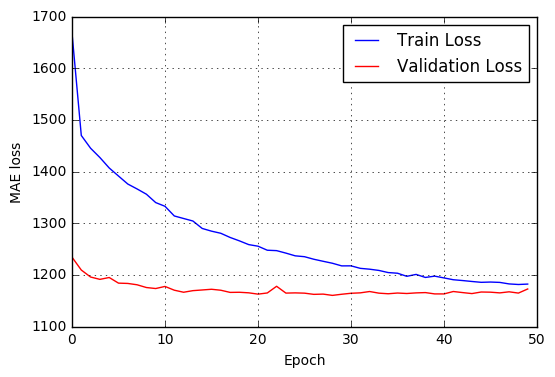

In [201]:
import matplotlib
import matplotlib.pyplot as plt
x=np.arange(0,50,1)
plt.plot(x,outputs.history['loss'],'b',label='Train Loss')
plt.plot(x,outputs.history['val_loss'],'r',label='Validation Loss')
plt.grid(True)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE loss')
plt.show()

Even if I crank up to 50 Epochs, not much improvement on the validiation